Fichier de traitements des CSVs

imports :

In [31]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataframes : 

In [29]:
a_to_z = pd.read_csv("../data/A_to_Z_Flowers_cleaned.csv")
plant_growth = pd.read_csv("../data/plant_growth_data.csv")
plant_health = pd.read_csv("../data/plant_health_data.csv")

traitement du fichier A_to_Z_Flowers_cleaned

In [ ]:
#suppression des balises html
def remove_html(text):
    if isinstance(text, str):
        return BeautifulSoup(text, "html.parser").get_text()
    return text

df_cleaned = a_to_z.applymap(remove_html)

df_cleaned.to_csv("../data/A_to_Z_Flowers_cleaned.csv", index=False)

print(df_cleaned.head())

                                          Name  \
0                            Achillea (Yarrow)   
1     Aconitum (Aconite; Monkshood; Wolfsbane)   
2  Agapanthus (African Lily; Lily of the Nile)   
3            Ageratum (Whiteweed; Flossflower)   
4                     Ajuga (Bugle; Bugleweed)   

                                                Desc            PlantType  \
0  Achillea, commonly known as Yarrow, is a genus...           Perennials   
1  Aconitum, also known as Aconite, is a genus of...           Perennials   
2  Agapanthus is a genus composed of about 10 spe...    Bulbs, Perennials   
3  Ageratum is a genus of about 50 species of ann...              Annuals   
4  Ajuga is a genus of about 70 species in the fa...  Annuals, Perennials   

                                               Color HardinessZones  \
0  Yarrow comes in a wide range of colors includi...            3-9   
1  The flowers come in shades of blue, purple, wh...            3-8   
2  These flowers are us

C:\Users\Noah\AppData\Local\Temp\ipykernel_13632\3952138697.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = a_to_z.applymap(remove_html)


Essai de création d'une base compatible pour un modèle

In [26]:
soil_types = ["Argile", "Limon", "Sable"]
plant_health["Soil_Type"] = np.random.choice(soil_types, size=len(plant_health))
print(plant_health.head())


                    Timestamp  Plant_ID  Soil_Moisture  Ambient_Temperature  \
0  2024-10-03 10:54:53.407995         1      27.521109            22.240245   
1  2024-10-03 16:54:53.407995         1      14.835566            21.706763   
2  2024-10-03 22:54:53.407995         1      17.086362            21.180946   
3  2024-10-04 04:54:53.407995         1      15.336156            22.593302   
4  2024-10-04 10:54:53.407995         1      39.822216            28.929001   

   Soil_Temperature   Humidity  Light_Intensity   Soil_pH  Nitrogen_Level  \
0         21.900435  55.291904       556.172805  5.581955       10.003650   
1         18.680892  63.949181       596.136721  7.135705       30.712562   
2         15.392939  67.837956       591.124627  5.656852       29.337002   
3         22.778394  58.190811       241.412476  5.584523       16.966621   
4         18.100937  63.772036       444.493830  5.919707       10.944961   

   Phosphorus_Level  Potassium_Level  Chlorophyll_Content  \
0

Sauvegarde du df dans un nouveau CSV test

In [ ]:
plant_health.to_csv("../data/test.csv", index=False)

Conversion des lux en W/m²

In [23]:
plant_health["Light_Intensity"] = plant_health["Light_Intensity"] / 247
print(plant_health.head())


                    Timestamp  Plant_ID  Soil_Moisture  Ambient_Temperature  \
0  2024-10-03 10:54:53.407995         1      27.521109            22.240245   
1  2024-10-03 16:54:53.407995         1      14.835566            21.706763   
2  2024-10-03 22:54:53.407995         1      17.086362            21.180946   
3  2024-10-04 04:54:53.407995         1      15.336156            22.593302   
4  2024-10-04 10:54:53.407995         1      39.822216            28.929001   

   Soil_Temperature   Humidity  Light_Intensity   Soil_pH  Nitrogen_Level  \
0         21.900435  55.291904         2.251712  5.581955       10.003650   
1         18.680892  63.949181         2.413509  7.135705       30.712562   
2         15.392939  67.837956         2.393217  5.656852       29.337002   
3         22.778394  58.190811         0.977378  5.584523       16.966621   
4         18.100937  63.772036         1.799570  5.919707       10.944961   

   Phosphorus_Level  Potassium_Level  Chlorophyll_Content  \
0

In [27]:
plant_health["EF"] = 1 - (plant_health["Soil_Temperature"] - plant_health["Ambient_Temperature"]) / (plant_health["Soil_Temperature"] + plant_health["Ambient_Temperature"])
print(plant_health.head())

                    Timestamp  Plant_ID  Soil_Moisture  Ambient_Temperature  \
0  2024-10-03 10:54:53.407995         1      27.521109            22.240245   
1  2024-10-03 16:54:53.407995         1      14.835566            21.706763   
2  2024-10-03 22:54:53.407995         1      17.086362            21.180946   
3  2024-10-04 04:54:53.407995         1      15.336156            22.593302   
4  2024-10-04 10:54:53.407995         1      39.822216            28.929001   

   Soil_Temperature   Humidity  Light_Intensity   Soil_pH  Nitrogen_Level  \
0         21.900435  55.291904       556.172805  5.581955       10.003650   
1         18.680892  63.949181       596.136721  7.135705       30.712562   
2         15.392939  67.837956       591.124627  5.656852       29.337002   
3         22.778394  58.190811       241.412476  5.584523       16.966621   
4         18.100937  63.772036       444.493830  5.919707       10.944961   

   Phosphorus_Level  Potassium_Level  Chlorophyll_Content  \
0

Visualisation de la répartition de l'humidité du sol en fonction des différents status de stress hydrique

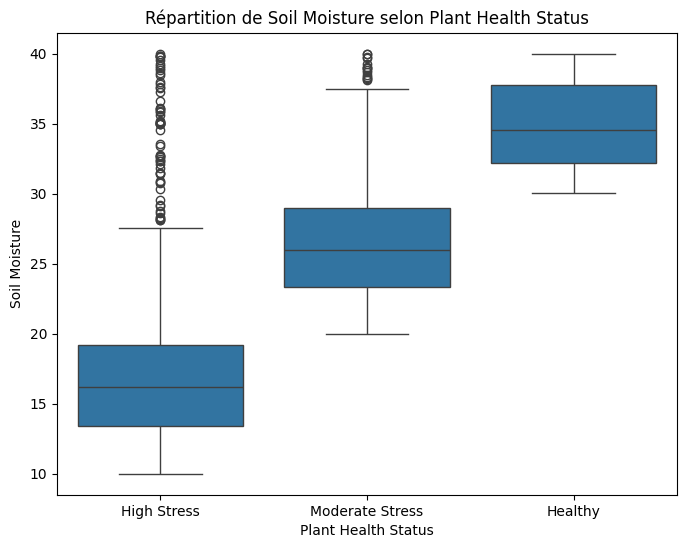

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Plant_Health_Status", y="Soil_Moisture", data=plant_health)
plt.title("Répartition de Soil Moisture selon Plant Health Status")
plt.xlabel("Plant Health Status")
plt.ylabel("Soil Moisture")
plt.show()

C:\Users\Noah\AppData\Local\Temp\ipykernel_20076\595639830.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Plant Health Status")


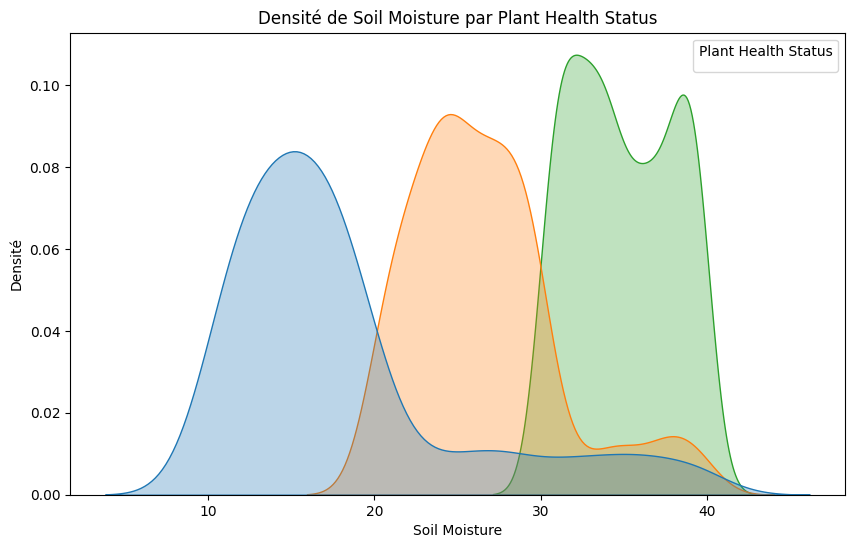

In [45]:
# Courbe de densité
plt.figure(figsize=(10, 6))
sns.kdeplot(data=plant_health, x="Soil_Moisture", hue="Plant_Health_Status", common_norm=False, fill=True, alpha=0.3)
plt.title("Densité de Soil Moisture par Plant Health Status")
plt.xlabel("Soil Moisture")
plt.ylabel("Densité")
plt.legend(title="Plant Health Status")
plt.show()